In [5]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from pyntcloud import PyntCloud
import numpy as np
import tensorflow as tf
import os, random

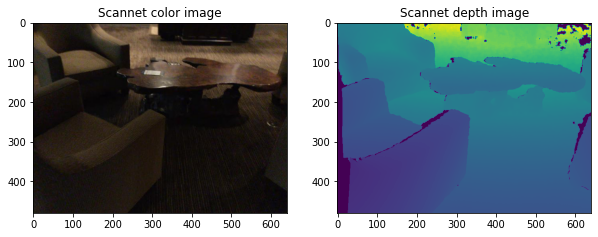

In [7]:
# sample scene and image to plot
path = "scannet/scans/"
scene = random.choice(os.listdir(path))
colorimg = random.choice(os.listdir(path+scene+"/color/"))

# read color image
color_raw=mpimg.imread(path+scene+'/color/'+colorimg)

# plot the depth image
depth_raw=mpimg.imread(path+scene+'/depth/'+colorimg[:-3]+'png')

f = plt.figure(figsize=(10,4))
ax = f.add_subplot(121)
ax.set_title('Scannet color image')
ax.imshow(color_raw)
ax2 = f.add_subplot(122)
ax2.set_title('Scannet depth image')
ax2.imshow(depth_raw)
plt.show()

In [8]:
anky = PyntCloud.from_file(path+scene+'/'+scene+'_vh_clean.ply')
anky

PyntCloud
866515 points with 7 scalar fields
1702193 faces in mesh
0 kdtrees
0 voxelgrids
Centroid: 3.250807762145996, 2.0450310707092285, 0.3634983003139496
Other attributes:

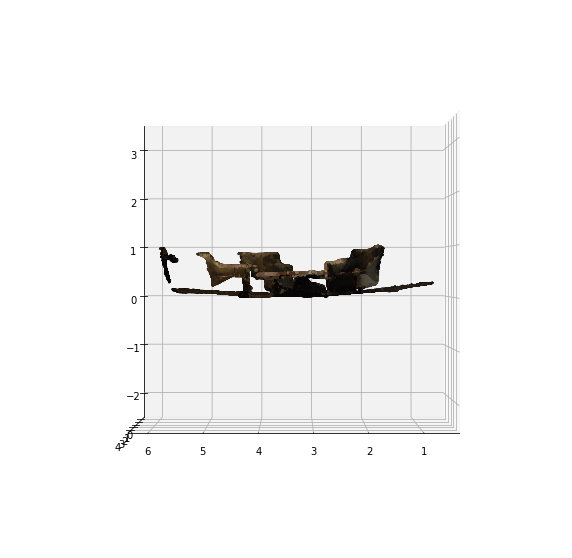

In [11]:
anky.plot(return_scene=True)

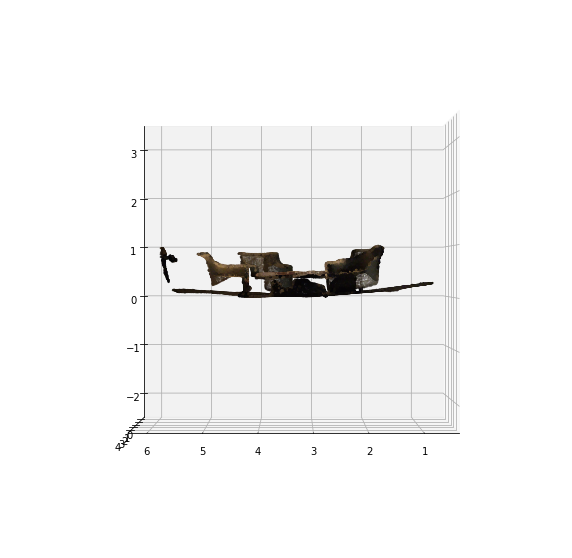

In [12]:
anky2 = PyntCloud.from_file(path+scene+'/'+scene+'_vh_clean_2.ply')
anky2.plot(return_scene=True)

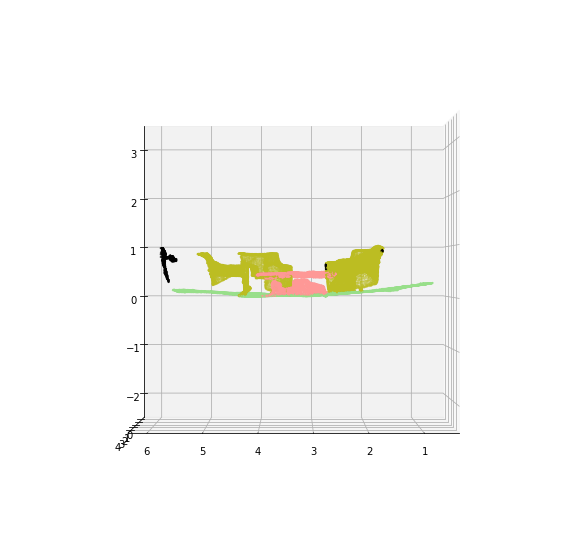

In [13]:
anky3 = PyntCloud.from_file(path+scene+'/'+scene+'_vh_clean_2.labels.ply')
anky3.plot(return_scene=True)

In [57]:
IMG_HEIGHT = 480
IMG_WIDTH = 640

def decode_img(img, color=True):
    img = open(img,'rb').read()
    if color:
        # convert the compressed string to a 3D uint8 tensor
        img = tf.image.decode_jpeg(img, dct_method="INTEGER_ACCURATE", channels=3)
    else:
        img = tf.image.decode_png(img, channels=0)
    # Use `convert_image_dtype` to convert to floats in the [0,1] range.
    img = tf.image.convert_image_dtype(img, tf.float32)
    # resize the image to the desired size.
    return tf.image.resize(img, [IMG_HEIGHT, IMG_WIDTH])

def decode_intrisics(filename):
    return tf.constant(np.loadtxt(filename))

def decode_scene(scenename):
    path = os.path.join("scannet/scans/",scenename)
    
    # process color and depth images in scene as tensors
    imglist = sorted(os.listdir(path+"/color/"))
    colorimgs = []
    depthimgs = []
    pose = []
    
    for img in imglist:
        colorimgs.append(decode_img(os.path.join(path, 'color', img)))
        depthimgs.append(decode_img(os.path.join(path, 'depth', img[:-3]+'png'), color=False))
        pose.append(decode_intrisics(os.path.join(path, 'pose', img[:-3]+'txt')))
    
    # decode RGB-D images
    colorimgs = tf.stack(colorimgs)
    depthimgs = tf.stack(depthimgs)
    
    # decode intrinsic_matrixes
    intrinsic_color = decode_intrisics(path+'/intrinsic_color.txt')
    intrinsic_depth = decode_intrisics(path+'/intrinsic_depth.txt')
    
    # decode pose
    pose = tf.stack(pose)
    
    return colorimgs, depthimgs, pose, intrinsic_color, intrinsic_depth

In [58]:
colorimgs, depthimgs, pose, intrinsic_color, intrinsic_depth = decode_scene("scene0000_00")

In [62]:
colorimgs.shape, depthimgs.shape, pose.shape

(TensorShape([279, 480, 640, 3]),
 TensorShape([279, 480, 640, 1]),
 TensorShape([279, 4, 4]))